# Training a model locally

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X, y = sklearn.datasets.make_blobs(n_samples=1000,
                                   centers=2,
                                   center_box=(4,8),
                                   random_state=42)

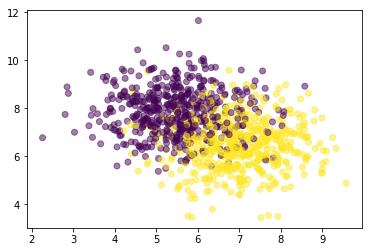

In [3]:
fig, ax = plt.subplots()

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5);

fig.savefig("/Users/mike/Desktop/fig.pdf")

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(Xtrain, ytrain)
classifier.score(Xtest, ytest)

0.838

# Hyperparameter optimization with pywren

In [6]:
all_hyperparams = [{'n_neighbors': k} for k in range(1, 9)]

In [7]:
all_hyperparams

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8}]

In [8]:
def train_model(hyperparams):
    classifier = KNeighborsClassifier(**hyperparams)
    classifier.fit(Xtrain, ytrain)
    return classifier

In [9]:
import pywren
pwex = pywren.default_executor()

In [10]:
classifiers = pywren.get_all_results(pwex.map(train_model, all_hyperparams))

/Users/mike/p/talks/pybay-serverless-datascientists/hyperparameters/.direnv/python-3.6.3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.19.0 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
for hyperparams, classifier in zip(all_hyperparams, classifiers):
    print(hyperparams, classifier.score(Xtest, ytest))

{'n_neighbors': 1} 0.758
{'n_neighbors': 2} 0.782
{'n_neighbors': 3} 0.814
{'n_neighbors': 4} 0.82
{'n_neighbors': 5} 0.838
{'n_neighbors': 6} 0.838
{'n_neighbors': 7} 0.842
{'n_neighbors': 8} 0.828


# Deployment and serving

In [12]:
import pickle_utils

pickle_utils.pickle_to_s3(bucket_name="modelservingdemo",
                          key="classifier.pkl",
                          obj=classifiers[6])